<a href="https://colab.research.google.com/github/J108218104/20200929-test/blob/master/20201027_yoloV4_0924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id '1ZVVIXWhvObJqC__cz9WHNyPfGgH4qSDB'

Downloading...
From: https://drive.google.com/uc?id=1ZVVIXWhvObJqC__cz9WHNyPfGgH4qSDB
To: /content/darknet.zip
266MB [00:01, 193MB/s]


In [2]:
!unzip darknet.zip

Archive:  darknet.zip
   creating: darknet/
   creating: darknet/.circleci/
  inflating: darknet/.circleci/config.yml  
   creating: darknet/.git/
   creating: darknet/.git/branches/
  inflating: darknet/.git/config     
  inflating: darknet/.git/description  
  inflating: darknet/.git/HEAD       
   creating: darknet/.git/hooks/
  inflating: darknet/.git/hooks/applypatch-msg.sample  
  inflating: darknet/.git/hooks/commit-msg.sample  
  inflating: darknet/.git/hooks/fsmonitor-watchman.sample  
  inflating: darknet/.git/hooks/post-update.sample  
  inflating: darknet/.git/hooks/pre-applypatch.sample  
  inflating: darknet/.git/hooks/pre-commit.sample  
  inflating: darknet/.git/hooks/pre-push.sample  
  inflating: darknet/.git/hooks/pre-rebase.sample  
  inflating: darknet/.git/hooks/pre-receive.sample  
  inflating: darknet/.git/hooks/prepare-commit-msg.sample  
  inflating: darknet/.git/hooks/update.sample  
  inflating: darknet/.git/index      
   creating: darknet/.git/info/
  infl

In [3]:
!ls

darknet  darknet.zip  sample_data


In [4]:
cd darknet/

/content/darknet


In [5]:
!ls

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       video_yolov3.sh
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov4.sh
cfg		data			net_cam_v4.sh	       yolov4.weights
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md


In [6]:
#定義imshow 使用opencv顯示圖片
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [13]:
!chmod 777 darknet
# 放需要被偵測的圖片
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/furnitures.jpg -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 rout

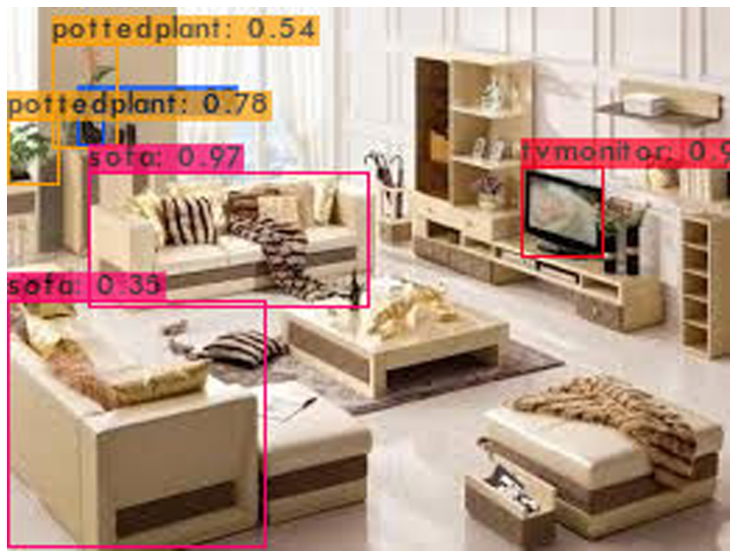

In [14]:
imShow('predictions.jpg')